### Sixtrack : Plot the 6D coordinates over time

1) Give the path to the turn by turn file from your sixtrack simulation. The way you run the scripts, they produce a .zip file. So first you need to extract the file here. Usually the extracted file have the name IP3_DUMP_1.




In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile 

In [36]:
# Plotting parameters
params = {'legend.fontsize': 25,
          'figure.figsize': (18, 15),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 8,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
zip_file_name = '/afs/cern.ch/work/n/natriant/private/workspaces/SPS_weighted_distributions_new/scratch0/w1/track/SPS_26GeV_nomult_3MVCC/1/simul/26.13_26.18/1/e3/45/test/Sixout.zip'

In [4]:
# opening the zip file in READ mode 
with ZipFile(zip_file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

File Name                                             Modified             Size
IP3_DUMP_1                                     1980-01-01 00:00:00       572248
Extracting all the files now...
Done!


In [45]:
df = pd.read_csv('IP3_DUMP_1', delim_whitespace=True, comment='#', header = None)

In [46]:
df.columns= ['particle_nb', 'turn_nb', 'bpm position', 'x','px','y','py','z','de_e','ktrack']

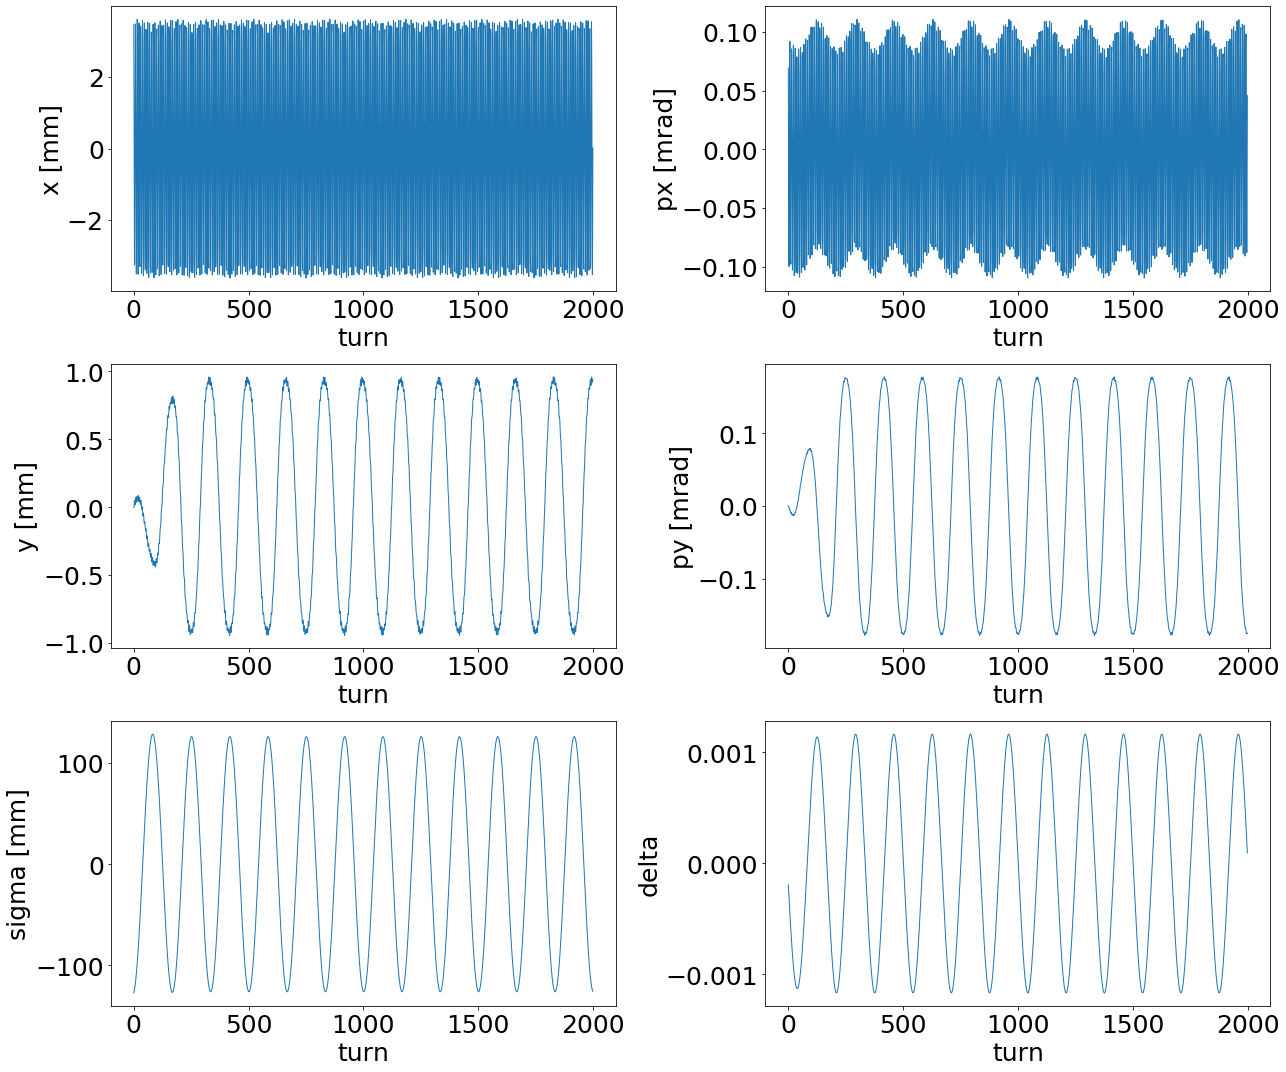

In [61]:
fig, axes = plt.subplots(3,2)
axes[0,0].plot(np.array(df['x'][::2]))
axes[0,1].plot(np.array(df['px'][::2]))
axes[1,0].plot(np.array(df['y'][::2]))
axes[1,1].plot(np.array(df['py'][::2]))
axes[2,0].plot(np.array(df['z'][::2]))
axes[2,1].plot(np.array(df['de_e'][::2]))
axes[0,0].set_ylabel('x [mm]')
axes[0,0].set_xlabel('turn')
axes[0,1].set_ylabel('px [mrad]')
axes[0,1].set_xlabel('turn')
axes[1,0].set_ylabel('y [mm]')
axes[1,0].set_xlabel('turn')
axes[1,1].set_ylabel('py [mrad]')
axes[1,1].set_xlabel('turn')
axes[2,0].set_ylabel('sigma [mm]')
axes[2,0].set_xlabel('turn')
axes[2,1].set_ylabel('delta')
axes[2,1].set_xlabel('turn')
plt.tight_layout()
#plt.savefig('coordinates_sps26GeV_Vrf2MV_lag180_CC3MV_lag90_1particle_sixtrack.png')